# Background

The purpose of the survey was to evaluate whether it was commercial interest in Norway for PLA 3d-printer filament that is locally produced. And whether people were interested in returning failed prints and other sources of PLA waste for recycling.

This is evaluated in context of the long-term goal of establishing a financially sustainable circular lifecycle for PLA bioplastic.

The survey was posted to two Norwegian Facebook groups focused on 3d-printing and 'making' on a Saturday in Feburary, 2018. Each group had approximately 1500 members. 120 reponses were collected over 2 weeks, approx 4% of the total 3000 group members (many which may not actually be active).

In [2]:
%matplotlib inline
import pandas
import numpy

# Raw data

In [3]:
raw = pandas.read_csv('./data/plafab-oslo-survey.anonymized.csv')
print('Responses:', len(raw))
raw[:2]

Responses: 121


,Timestamp,Hvor mange 3d-printere har du i aktiv bruk i dag?,Hvor mange kilo PLA filament kjøper du per år?,Hvilken diameter bruker du (mest)?,Hva er det meste du er villig til å betale for norskprodusert PLA filament?,Hvilke farger bruker du mest? (maks 3 valg),Hvor mye PLA filament kan du levere til gjenvinning per år?,Vil du høre mer via epost når vi lanserer?,Har du noen tilbakemeldinger eller tips til oss?,Hvor i Norge bor du?
0,2/17/2018 15:34:51,NaN,0,1.75 mm,mindre enn 300 kr/kg,"Sort, Hvit, Klar",NaN,NaN,Nei,NaN
1,2/17/2018 16:20:34,2.0,10,1.75 mm,350 kr / kg,"Sort, Hvit",2.0,NaN,NaN,NaN


# Data cleaning

In [4]:
field_name_map = {
    'Hvor mange 3d-printere har du i aktiv bruk i dag?': 'printers', # currently active
    'Hvor mange kilo PLA filament kjøper du per år?': 'filament purchased', # per year
    'Hvilken diameter bruker du (mest)?': 'diameter used',
    'Hva er det meste du er villig til å betale for norskprodusert PLA filament?': 'price preference',
    'Hvilke farger bruker du mest? (maks 3 valg)': 'colors used',
    'Hvor mye PLA filament kan du levere til gjenvinning per år?': 'filament for recycling', # i kilos
    'Vil du høre mer via epost når vi lanserer?': 'contact_email',
    'Har du noen tilbakemeldinger eller tips til oss?': 'feedback',
    'Hvor i Norge bor du?': 'location',
    'Timestamp': 'timestamp',
}
cleaned = raw.rename(columns=field_name_map)
cleaned.drop(0, inplace=True) # submission test
cleaned[:2]

,timestamp,printers,filament purchased,diameter used,price preference,colors used,filament for recycling,contact_email,feedback,location
1,2/17/2018 16:20:34,2.0,10,1.75 mm,350 kr / kg,"Sort, Hvit",2.0,NaN,NaN,NaN
2,2/17/2018 16:21:15,1.0,3,1.75 mm,400 kr / kg,"Hvit, Grå, Grønn",2.0,NaN,NaN,NaN


In [5]:
color_name_map = {
    'sort': 'black',
    'hvit': 'white',
    'grå': 'gray',
    'grønn': 'green',
    'rød': 'red',
    'blå': 'blue',
    'klar': 'transparent',
    'transparent': 'transparent',
    'oransje': 'orange',
    'oransj': 'orange',
    'orange': 'orange',
}
colors = {}
for row in cleaned['colors used']:
    used = row.split(',')
    for c in used:
        original = c.strip().lower()
        mapped = color_name_map.get(original, "other")
        #if mapped == 'other': print('unknown color:', original)
        if colors.get(mapped) is None:
            colors[mapped] = 0
        colors[mapped] += 1
colors = pandas.DataFrame({'colors': colors})
colors

,colors
black,91
blue,31
gray,48
green,8
orange,4
other,4
red,28
transparent,2
white,82


In [6]:
preference_map = {
    'mindre enn 300 kr/kg': '299 kr/kg or less',
    'mer enn 500 kr/kg': '501 kr/kg or more',
}
cleaned['price preference'].replace(preference_map, inplace=True)
cleaned['price preference'].value_counts()

299 kr/kg or less    39
300 kr / kg          38
350 kr / kg          26
400 kr / kg          12
500 kr / kg           3
501 kr/kg or more     1
450 kr / kg           1
Name: price preference, dtype: int64

In [7]:
cleaned['timestamp'] = pandas.to_datetime(cleaned['timestamp'])
cleaned['timestamp'][:2]

1   2018-02-17 16:20:34
2   2018-02-17 16:21:15
Name: timestamp, dtype: datetime64[ns]

# Analysis

## Responses

**50% left their email addresses** for further news/update about the project. This is a pretty strong indicator of interest in the project.

Note: Raw data unavailable about who left email is unavailable, email was nulled for anonymization reasons.

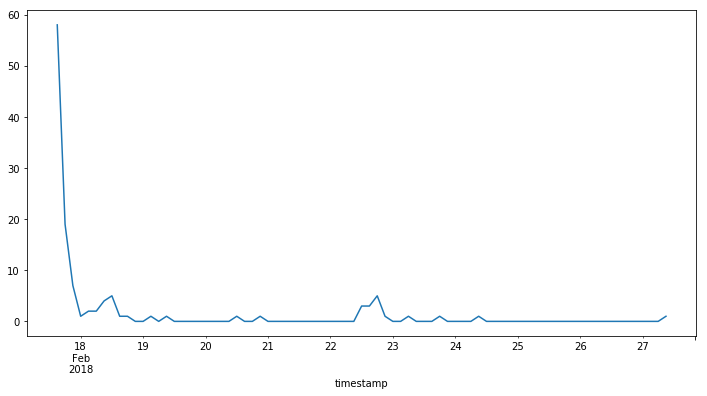

In [8]:
timed = cleaned.copy()
timed.index = timed['timestamp']
timed['printers'].resample('3h').count().plot(figsize=(12,6));

Most responses were made immediately after posting. Over 50 responses of the 120 responses were made within the first 3 hours. This may be partly due to Facebook preference of giving visibility to very recent content.


## Printers in use
This question was included mostly to ensure that those that respond actually are potential customers.

0.0     6
1.0    65
2.0    32
3.0     9
4.0     3
5.0     1
6.0     4
Name: printers, dtype: int64

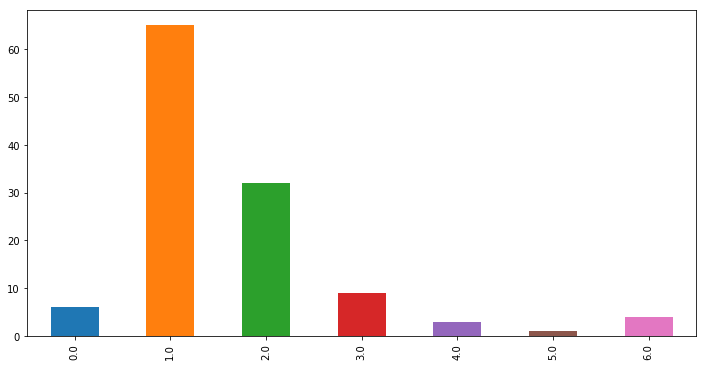

In [9]:
printer_count = cleaned['printers'].value_counts().sort_index()
printer_count.plot(kind='bar', figsize=(12,6))
printer_count

Majority of respondents have 1 printer in use. However over 40% have more than one.

## Filament purchase

Per year


7.0

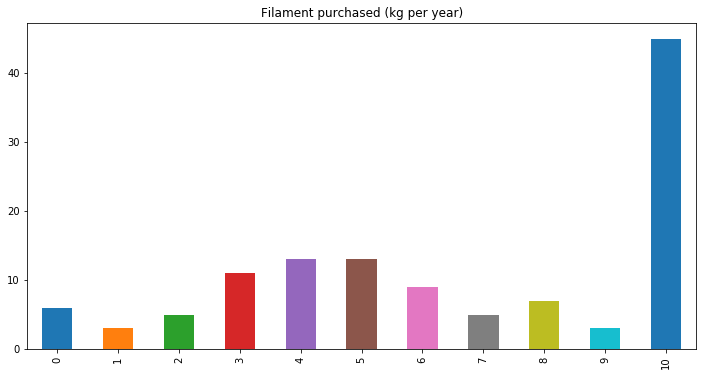

In [10]:
filament_purchase_counts = cleaned['filament purchased'].value_counts().sort_index()
filament_purchase_counts.plot(kind='bar', figsize=(12, 6), title='Filament purchased (kg per year)')
filament_purchase_counts.median()

A large amount of respondents say they buy more than 10kg/year, and the median is 7 kg/year.

In [11]:
cleaned['filament purchased'].sum()

785

Just by providing these 120 respondends with *parts* of their consumption can cover 100++ kg/yearly. With targeted marketing in the communities the survey was shared with, it could be possible to sell 1000 kg/yearly.

## Filament for recycling

5.5

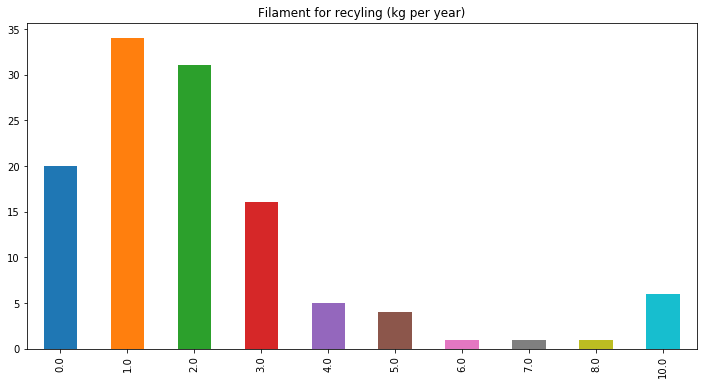

In [15]:
filament_recycle_counts = cleaned['filament for recycling'].value_counts().sort_index()
filament_recycle_counts.plot(kind='bar', figsize=(12, 6), title='Filament for recyling (kg per year)')

In [19]:
cleaned['filament for recycling'].sum()

265.0

The amount of filament people say they have for recycling is naturally significantly less than what they buy.

Nevertheless, for these 120 respondents, the sum is estimated to nearly 300 kg. Assuming 300 NOK/kg for the filament purchase price, that is an economic waste of 80'000 NOK yearly.

## Color options


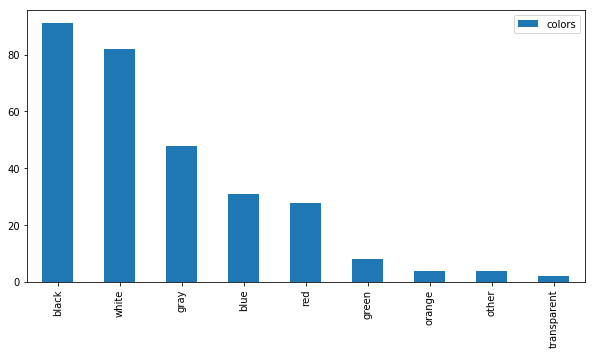

In [173]:
colors.sort_values(by='colors', ascending=False).plot(kind='bar', figsize=(10, 5));

Most used are black,white and gray. It looks like one could do OK by offering just 2-3 filament colors.

## Diameter options


1.75 mm    0.925620
2.85 mm    0.066116
3.0 mm     0.008264
Name: diameter used, dtype: float64

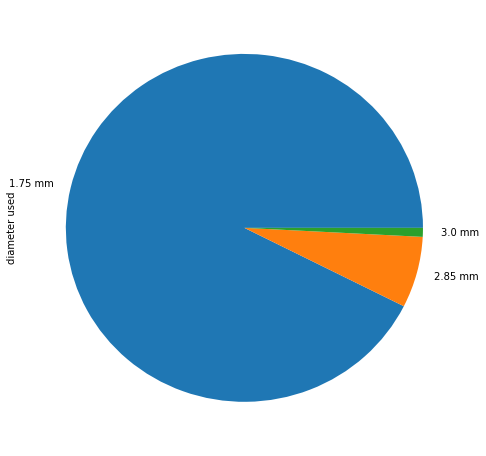

In [103]:
cleaned['diameter used'].value_counts().plot(kind='pie', figsize=(8,8))
cleaned['diameter used'].value_counts(normalize=True)

Over 90% used 1.75 mm filament. It should be OK to only offer this variant.

# Price preference

299 kr/kg or less    0.330579
300 kr / kg          0.314050
350 kr / kg          0.214876
400 kr / kg          0.099174
500 kr / kg          0.024793
501 kr/kg or more    0.008264
450 kr / kg          0.008264
Name: price preference, dtype: float64

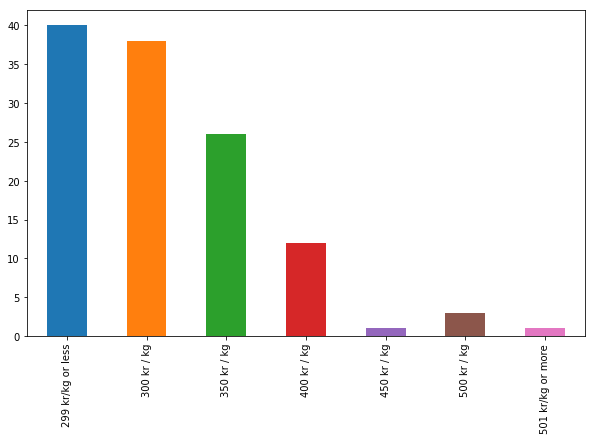

In [108]:
price_counts = cleaned['price preference'].value_counts().sort_index()
price_counts.plot(kind='bar', figsize=(10,6))
cleaned['price preference'].value_counts(normalize=True)

People have a **very strong preference for cheap filament**, with two thirds choosing the two lowest options.

There is **no indication that people are willing to pay more for locally produced filament**.

# Conclusions

The high amount of respondents, and high amount of filament purchased by respondents indicate it is possible to sell an amount of filament needed for a micro business (NNN-NNNN kilos/year).

However there is no support for the thesis that consumers are willing to pay a premium for 'locally produced' (filament from raw pellets). This means that without other differentiation, one has to compete on price alone. As prices are likely to drop in the future, this seems a rather weak position. 

More data would be needed on the production side in order to determine whether there could be sufficient margin to operate. However the prices indicated here suggest a low margin.

## Quality concerns

The quality of product needed for 3d-printing filament is very high. Tolerances of diameter variation, foreign substances, plastic properties that stay over time (ex: low brittleness).

Attempting to recyle material means trying to deliver needed quality from a material stream with many varying  parameters. One also needs to get the material to facilities. Without a price preference, all this must be should be achievable at prices comparable to that of pure PLA material, currently below 50 NOK/kg.

So to enable a circular lifecycle with recycled inputs, it would be better to find less quality-critical uses for the plastic.